In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [3]:
#df_C10inC4dist = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_C10inC4dist.csv')

df_C10inC4dist = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\Project rC4\Jupyter Notebooks\0 - Current\2 EDA\outlierHandling.csv")

# Print descriptive statistics for df_C10inC4dist
df_C10inC4dist.describe()

,425 %Al,Butanol,Decanol,Ethanol,Hexanol,Octanol,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000
mean,6.123432,8.937353,3.035194,18.565081,3.430895,4.019246,11.244427,0.930132,0.941415,0.997859,35834.801906,32673.804466,5962.650533,866.541787,44583.393280,40509.536118,36334.969265,28140.949324,6594.673244,372.622742,0.994148,0.774232,36083.016489,170.834678,63.071385,63.530133,58.201635,69.770945,41.079395,47.156944,38.439803,2.231752,-1.475011,1.010527,75.254292,168.725631,182.656353,181.012906,196.909024,73.960087,130.018466,201.858195,197.783438,195.493854,190.623077,186.451478,223.101002,218.619137,2.793814
std,0.270083,9.166443,1.546261,17.795719,1.953103,2.157110,4.606969,0.067451,0.039499,0.049480,5170.395438,6006.520047,829.273244,606.566101,6197.800858,5230.978896,4094.662498,3319.177534,360.119470,255.989174,0.039482,0.022781,4031.201341,28.151019,2.519162,6.839006,10.649412,3.039255,1.507018,27.934828,20.228846,1.171439,1.102666,0.984242,16.552215,15.263851,27.899751,1.505178,12.836879,15.263106,12.145323,17.686484,13.689327,13.555681,9.152971,9.653588,9.106934,3.786392,0.948088
min,4.954510,0.000000,0.000000,0.000000,0.000000,0.000000,-2.739120,0.794541,0.819219,0.845412,16906.900000,12957.700000,2899.840000,0.000000,20466.100000,19729.300000,19431.600000,14723.300000,5167.950000,0.000000,0.814458,0.697549,18934.000000,81.084500,53.881100,42.598200,27.970000,60.093800,32.425100,0.000000,0.006367,0.001366,-4.770690,-2.094890,27.143100,120.531000,110.534000,175.781000,156.727000,27.672700,96.720000,161.963000,169.311000,166.079000,171.047000,159.702000,207.365000,206.266000,0.242948
25%,5.987920,3.676930,1.810000,5.700000,1.830000,2.175000,9.723260,0.892220,0.914927,0.966846,33827.900000,29005.900000,5443.630000,372.141000,41331.500000,38626.500000,35101.300000,27333.700000,6372.860000,197.140000,0.970178,0.759582,34554.700000,150.919000,61.750000,60.227200,49.726800,67.885900,40.555800,23.579600,23.427900,1.290080,-2.312840,0.234045,64.412400,156.182000,162.653000,179.969000,185.885000,63.351500,121.522000,187.905000,187.149000,185.039000,183.515000,179.162000,217.706000,215.608000,2.127810
50%,6.130570,5.650000,2.899560,12.500000,3.151050,3.866860,10.767800,0.941712,0.937727,0.997235,37675.700000,32689.000000,5980.930000,859.720000,45941.900000,41589.700000,37934.800000,29239.200000,6569.290000,344.384000,0.992266,0.778058,37362.600000,168.155000,63.298500,65.374700,60.040400,70.114800,41.202800,49.611300,44.106200,2.011460,-1.450000,0.801721,76.166800,172.500000,176.790000,180.125000,199.955000,77.118900,130.560000,199.959000,196.438000,194.143000,189.411000,185.464000,220.766000,217.959000,2.627470
75%,6.270580,9.900000,4.068490,25.340000,4.753330,5.516670,13.285500,0.981556,0.961517,1.031560,39342.800000,36235.100000,6522.030000,1338.720000,48659.200000,43771.700000,38989.800000,30178.700000,6799.840000,531.682000,1.013360,0.789962,38752.100000,189.278000,64.886400,68.091100,67.338200,71.887300,41.578300,73.255500,53.540500,3.025610,-0.500989,1.695980,85.055500,180.767000,201.163000,182

In [4]:
num_columns = df_C10inC4dist.shape[1]
print("Number of features:", num_columns)

Number of features: 50


In [5]:
# Assuming df_C10inC4dist is your DataFrame
non_date_columns = df_C10inC4dist.columns[df_C10inC4dist.columns != 'Date']

# Drop rows where any value (excluding 'Date') is 0 or less
df_C10inC4dist = df_C10inC4dist.drop(df_C10inC4dist[(df_C10inC4dist[non_date_columns] <= 0).any(axis=1)].index)

df_C10inC4dist



,425 %Al,Butanol,Decanol,Ethanol,Hexanol,Octanol,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B,Date
113,6.41265,10.46200,0.923263,7.92800,1.157510,1.40842,10.91310,0.969234,0.957669,0.997832,23430.4,24274.9,6167.16,850.753,31402.1,33413.1,26889.9,20873.4,6269.43,627.604,1.000420,0.779241,26656.1,143.354,67.3750,64.0108,60.0109,66.6861,42.9566,3.46219,25.1107,0.720133,0.021032,1.557520,76.0711,149.938,136.831,178.813,217.202,76.0438,138.080,173.443,173.654,168.365,174.321,172.298,219.269,218.290,5.70456,2012-06-13 01:00:00
120,6.43708,26.08800,3.030050,25.18470,3.443780,4.72283,10.93530,0.951956,0.954333,1.009710,39314.1,33464.8,7483.32,1538.350,48117.3,42632.4,39868.4,31238.6,6259.81,735.062,0.999725,0.779502,39994.4,191.900,61.1192,65.0270,59.9378,64.4448,39.7649,20.12050,22.3030,0.814094,0.000584,0.555986,80.5892,161.123,175.117,180.148,214.608,77.1664,145.120,198.617,193.669,188.059,186.868,184.676,211.135,215.333,5.67422,2012-06-14 14:00:00
136,6.47781,2.80389,1.939300,3.29878,1.494970,2.27240,8.02036,0.935789,0.935017,0.983793,30499.0,18253.8,5114.14,1512.370,41383.9,37674.1,29966.3,23721.6,6274.54,775.457,1.154360,0.790744,34533.5,120.697,54.4643,65.6196,59.8911,64.8597,39.9612,35.56970,20.9101,1.590080,0.031251,1.833310,84.2806,167.161,184.805,179.998,198.540,84.8961,135.189,204.516,199.723,193.694,191.897,189.403,220.334,218.796,2.73878,2012-06-17 11:00:00
137,6.47766,3.06351,1.998600,3.79172,1.549950,2.35059,7.84134,0.936662,0.939764,0.982284,30731.6,18117.4,5611.40,1461.850,40424.3,37701.1,29972.6,23653.1,6251.69,741.645,1.144730,0.786972,34522.9,120.270,56.3300,64.7310,59.9063,64.7554,39.7008,35.56970,20.8829,1.528490,0.016316,1.689060,94.2153,168.496,181.807,180.436,199.976,87.2905,136.554,202.456,197.963,192.256,190.659,188.399,219.865,218.286,2.73587,2012-06-17 12:00:00
138,6.47752,3.32312,2.057890,4.28465,1.604930,2.42879,7.99566,0.937282,0.939375,0.983710,30465.8,19376.2,5708.18,1512.470,40769.5,37313.8,29921.2,23656.9,6251.06,747.384,1.151510,0.790655,34531.9,125.814,58.2429,64.9750,59.9613,65.1008,39.7200,35.55970,20.8729,1.586940,0.014560,1.470650,100.2980,169.900,180.385,180.300,199.241,89.2122,137.893,201.235,196.631,191.066,189.734,187.382,219.549,217.982,2.39145,2012-06-17 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49926,6.43799,1.27667,0.840000,4.37333,0.860000,1.06667,1.86927,0.794854,0.971421,0.922143,28016.0,30057.2,5727.05,1561.550,38911.6,40411.4,32961.2,26392.8,6410.05,495.961,0.966720,0.799833,31931.2,170.045,61.3496,64.9951,76.3575,76.4964,39.4792,67.34720,63.7928,4.734000,0.048681,2.525770,109.8510,179.201,225.403,179.941,203.265,101.4540,155.633,231.815,220.056,218.306,205.827,196.091,230.252,227.775,2.54983,2023-07-30 13:00:00
49927,6.43645,1.32333,0.855000,3.96667,0.910000,1.13333,2.37410,0.794854,0.974875,0.925200,28068.9,28556.6,5876.96,1448.000,38186.7,38692.7,33039.1,26374.0,6368.91,521.963,0.971779,0.800919,32027.3,167.773,60.4107,65.6214,77.0672,77.3102,40.7247,67.85100,64.1410,5.108920,0.532059,2.899770,108.8130,179.152,221.225,179.779,206.274,102.2530,156.475,230.721,218.674,217.488,204.664,195.091,231.867,228.983,2.55230,2023-07-30 14:00:00
49928,6.43491,1.37000,0.870000,3.56000,0.960000,1.20000,2.37060,0.794854,0.974466,0.924491,27998.4,27086.0,5259.15,1603.180,39090.8,39684.0,33101.3,26367.2,6369.15,515.907,0.972086,0.796841,31977.3,161.442,60.1571,66.9211,77.0388,77.0347,40.3619,68.29660,64.5211,5.661390,0.784171,3.455530,115.0270,179.295,229.760,180.051,206.425,103.9720,157.920,232.481,219.812,217.583,205.319,194.7

In [6]:
df_C10inC4dist['Date'] = pd.to_datetime(df_C10inC4dist['Date'])
print(df_C10inC4dist.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


425 %Al            float64
Butanol            float64
Decanol            float64
Ethanol            float64
Hexanol            float64
Octanol            float64
AYC55580           float64
DI55102            float64
DI55152            float64
DI55580            float64
FC42428            float64
FC52018            float64
FC55003            float64
FC55009            float64
FC55102            float64
FC55152            float64
FC55552            float64
FC55555            float64
FC55569            float64
FC55576            float64
FFC55553           float64
FFC55555           float64
FYC55553           float64
II52554            float64
LC52572            float64
LC55553            float64
LC55555            float64
LC55557            float64
LC55568            float64
LC90366            float64
LC90368            float64
PI55004            float64
PI55020            float64
PI55560            float64
TC52015            float64
TC55552            float64
TC55553            float64
T

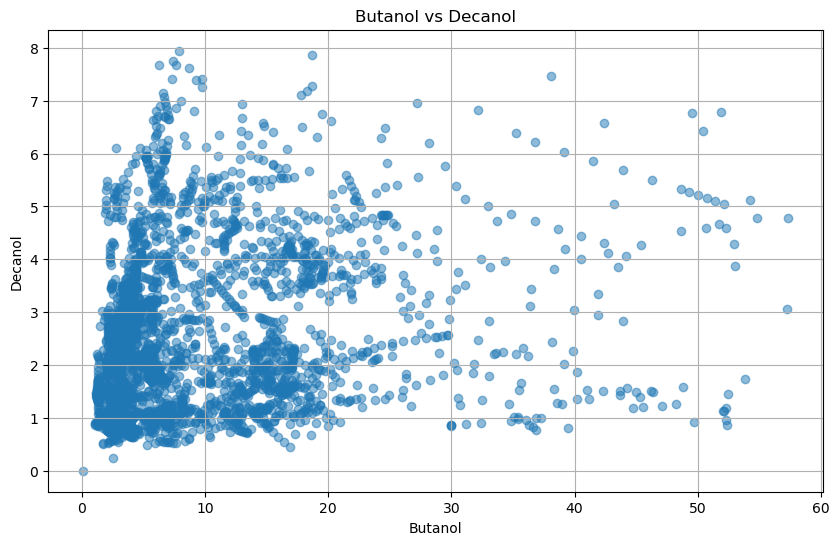

In [7]:

# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.scatter(df_C10inC4dist['Butanol'], df_C10inC4dist['Decanol'], alpha=0.5)  # Create a scatter plot
plt.title('Butanol vs Decanol')  # Set the title of the plot
plt.xlabel('Butanol')  # Set the x-axis label
plt.ylabel('Decanol')  # Set the y-axis label
plt.grid(True)  # Add a grid for easier reading
plt.show()  # Display the plot


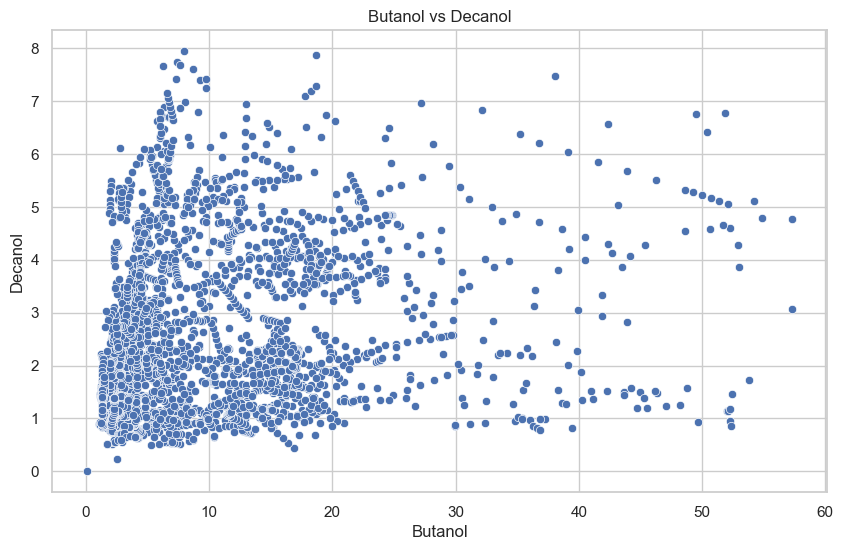

In [8]:


# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

sns.set_theme(style="whitegrid")  # Set the theme for the plot with a white grid background
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Butanol', y='Decanol', data=df_C10inC4dist)
plt.title('Butanol vs Decanol')
plt.show()


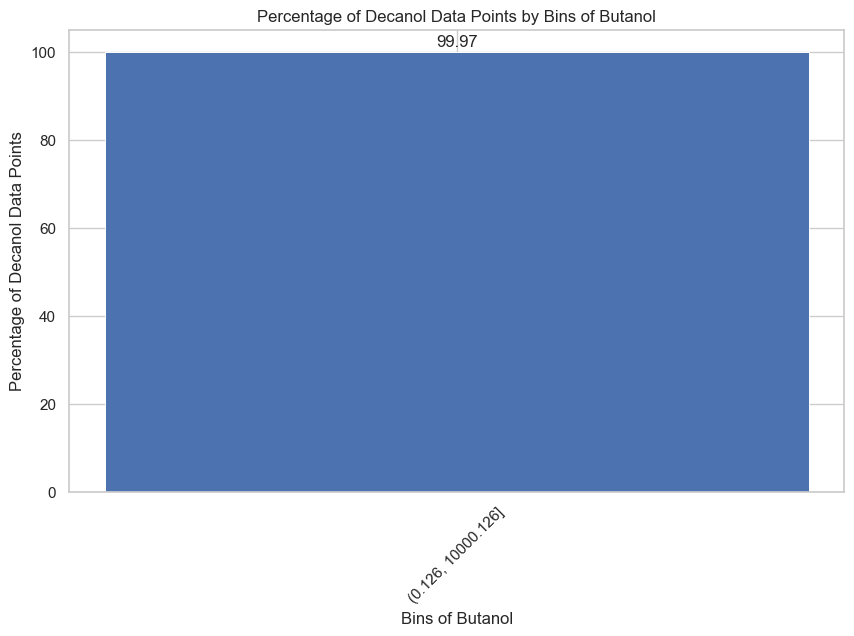

In [9]:

# Assuming your DataFrame is named df_C10inC4dist and it has columns 'Butanol' and 'Decanol'

# Create bins for the Butanol variable from the min to max in increments of 5
bin_width = 10000
bins = np.arange(df_C10inC4dist['Butanol'].min(), df_C10inC4dist['Butanol'].max() + bin_width, bin_width)
df_C10inC4dist['Butanol_bins'] = pd.cut(df_C10inC4dist['Butanol'], bins)

# Get the counts for Decanol in each bin
decanol_counts_per_bin = df_C10inC4dist.groupby('Butanol_bins')['Decanol'].count()

# Calculate the percentage of Decanol data points in each bin
total_decanol_counts = df_C10inC4dist['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add the text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


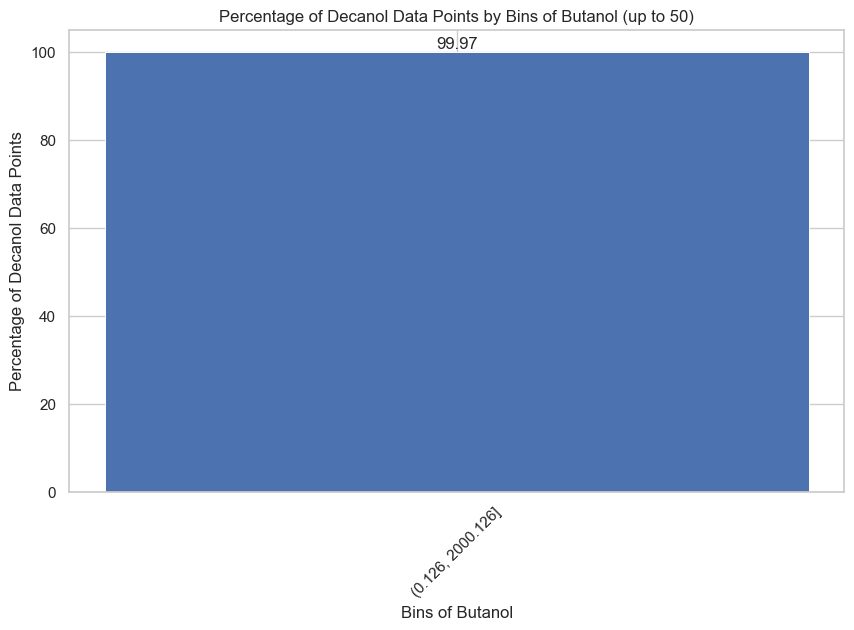

In [10]:

# Assuming you have a DataFrame df_C10inC4dist with 'Butanol' and 'Decanol' columns
# Let's say you want to set the maximum Butanol value to 50 for the chart
max_butanol_value = 10000
filtered_df = df_C10inC4dist[df_C10inC4dist['Butanol'] <= max_butanol_value].copy()  # Create a copy to avoid SettingWithCopyWarning

# Now create bins from the filtered data
bin_width = 2000
bins = np.arange(filtered_df['Butanol'].min(), filtered_df['Butanol'].max() + bin_width, bin_width)

# The adjusted line to avoid the DeprecationWarning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)

# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


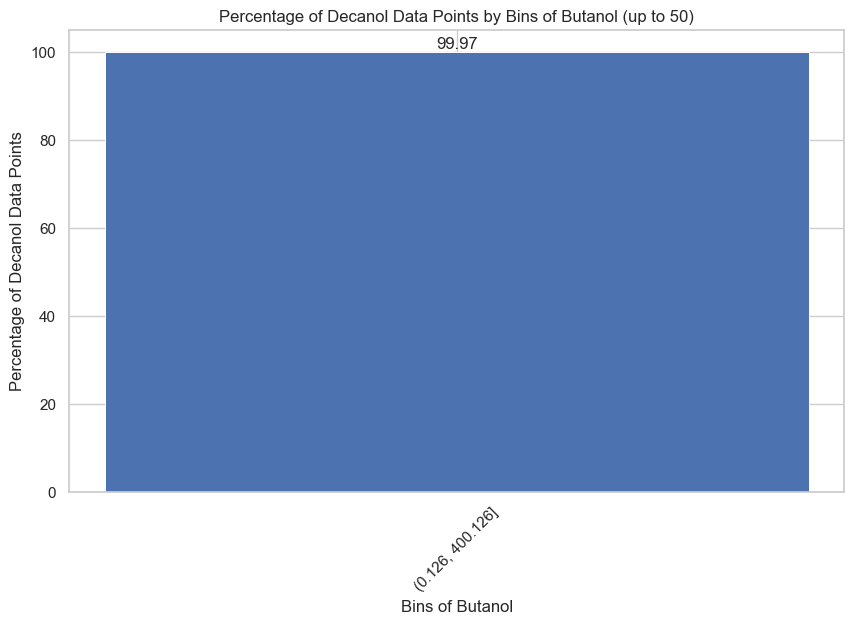

In [11]:

# Assuming you have a DataFrame df_C10inC4dist with 'Butanol' and 'Decanol' columns
# Let's say you want to set the maximum Butanol value to 50 for the chart
max_butanol_value = 2000
filtered_df = df_C10inC4dist[df_C10inC4dist['Butanol'] <= max_butanol_value].copy()  # Create a copy to avoid SettingWithCopyWarning

# Now create bins from the filtered data
bin_width = 400
bins = np.arange(filtered_df['Butanol'].min(), filtered_df['Butanol'].max() + bin_width, bin_width)

# The adjusted line to avoid the DeprecationWarning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)

# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


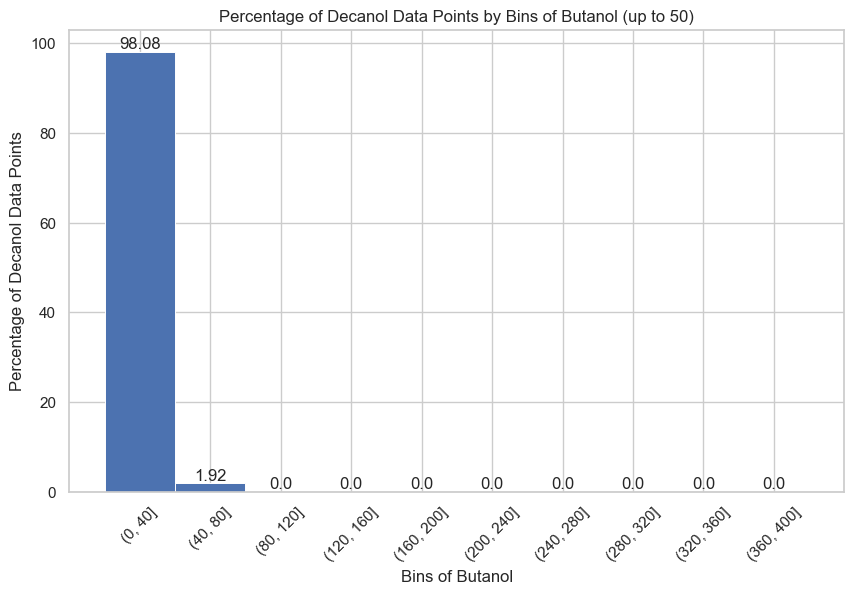

In [12]:
# Set the maximum value of Butanol you want to consider
max_butanol_value = 400  # Replace with your desired max value

# Filter the DataFrame to only include Decanol values less than 5
# and Butanol values less than or equal to max_butanol_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & (df_C10inC4dist['Butanol'] <= max_butanol_value)]

# Now proceed with the binning on this filtered DataFrame
bin_width = 40
bins = np.arange(0, max_butanol_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)


# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


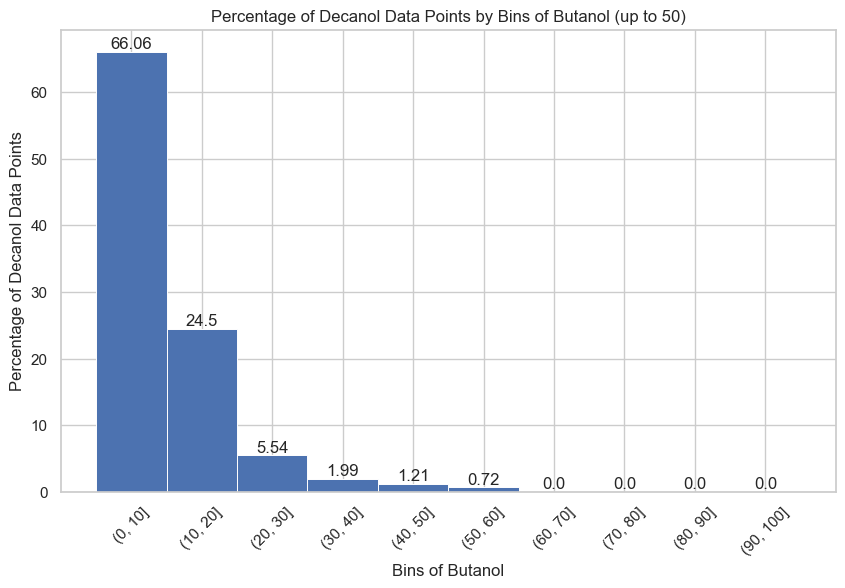

In [13]:
# Set the maximum value of Butanol you want to consider
max_butanol_value = 100  # Replace with your desired max value

# Filter the DataFrame to only include Decanol values less than 5
# and Butanol values less than or equal to max_butanol_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & (df_C10inC4dist['Butanol'] <= max_butanol_value)]

# Now proceed with the binning on this filtered DataFrame
bin_width = 10
bins = np.arange(0, max_butanol_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['Butanol_bins'] = pd.cut(filtered_df['Butanol'], bins)


# Calculate the percentage of Decanol data points in each bin
decanol_counts_per_bin = filtered_df.groupby('Butanol_bins')['Decanol'].count()
total_decanol_counts = filtered_df['Decanol'].count()
decanol_percentage_per_bin = (decanol_counts_per_bin / total_decanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(decanol_percentage_per_bin.index.astype(str), decanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Decanol Data Points by Bins of Butanol (up to 50)')
plt.xlabel('Bins of Butanol')
plt.ylabel('Percentage of Decanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


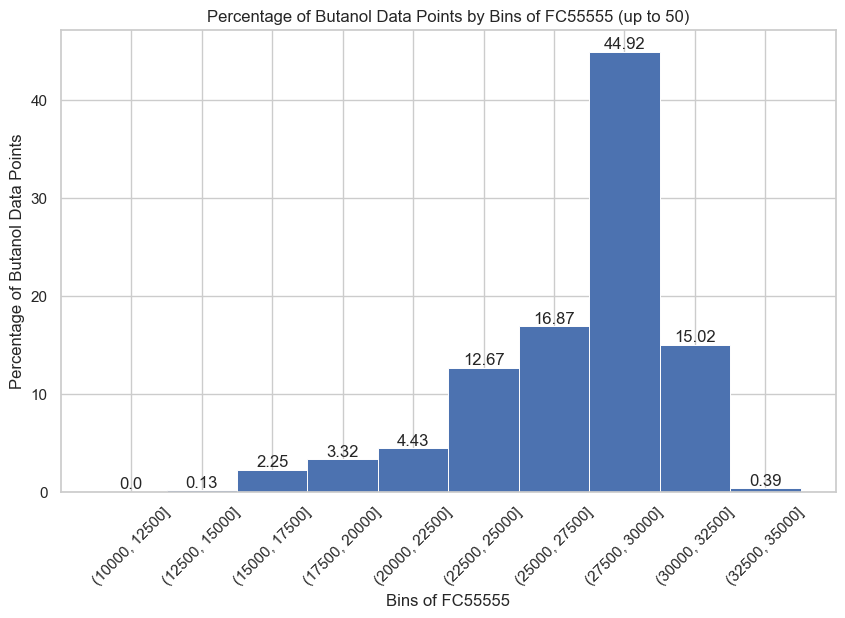

In [14]:
# Set the maximum value of FC55555 you want to consider
max_FC55555_value = 35000  # Replace with your desired max value
min_FC55555_value = 10000

# Filter the DataFrame to only include Butanol values less than 5
# and FC55555 values less than or equal to max_FC55555_value
df_filtered = df_C10inC4dist[(df_C10inC4dist['Decanol'] < 5) & 
                      (df_C10inC4dist['Butanol'] < 62) & 
                      (df_C10inC4dist['FC55555'] <= max_FC55555_value) &
                      (df_C10inC4dist['FC55555'] >= min_FC55555_value)
                      ]

# Now proceed with the binning on this filtered DataFrame
bin_width = 2500
bins = np.arange(min_FC55555_value, max_FC55555_value + bin_width, bin_width)  # start from 0 for consistent binning
filtered_df['FC55555_bins'] = pd.cut(filtered_df['FC55555'], bins)


# Calculate the percentage of Butanol data points in each bin
Butanol_counts_per_bin = filtered_df.groupby('FC55555_bins')['Butanol'].count()
total_Butanol_counts = filtered_df['Butanol'].count()
Butanol_percentage_per_bin = (Butanol_counts_per_bin / total_Butanol_counts) * 100

# Now plot this data
plt.figure(figsize=(10, 6))
bars = plt.bar(Butanol_percentage_per_bin.index.astype(str), Butanol_percentage_per_bin, width=1, edgecolor="white", linewidth=0.7)

# Add percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Percentage of Butanol Data Points by Bins of FC55555 (up to 50)')
plt.xlabel('Bins of FC55555')
plt.ylabel('Percentage of Butanol Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
